In [8]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np



import folium


In [11]:
soft_stories = gpd.read_file('soft_story_properties.geojson')

# Basic EDA

Per DataSF: “The Mandatory Soft Story Program provides a weekly update on the status of properties identified as soft story.
The dataset represents the different Compliance Tiers for the Mandatory Soft Story Program and the current status of these properties. For more information on the Compliance Tiers, please contact the Soft Story Program.
Tier I. Buildings that contain a Group A, E, R- 2.1, R-3.1 or R-4 occupancy on any story
Tier II. Buildings containing 15 or more dwelling units, except for buildings assigned to Tier I or Tier IV
Tier III. Building not falling within the definition of another tier.
Tier IV. Buildings that contain a Group B or M occupancy on the first story or in a basement or underfloor area that has any portion extending above grade, and buildings that are in mapped liquefaction zones, except for buildings assigned to Tier 1.”
Letter groups are the occupancy classifications of the building


In [25]:
# check for nulls
soft_stories.isnull().sum()

tier                0
data_loaded_at      0
block               0
property_address    0
status              0
bos_district        7
lot                 0
address             0
parcel_number       0
data_as_of          0
geometry            7
dtype: int64

# 7 addresses with null geometries

In [13]:
soft_stories['tier'].value_counts()


tier
3    3393
4    1027
2     514
1       7
Name: count, dtype: int64

flagging that majority of these tiers do not fall under a scope.

number 2 biggest is tier 4, liquification zones. may want to focus on this as something.

-- need to look at group 3 and see if they have any general patterns


In [18]:
soft_stories['status'].value_counts()


status
Work Complete, CFC Issued    4608
Non-Compliant                 328
work Complete, CFC Issued       3
Newly Added - Issued            1
Newly Added                     1
Name: count, dtype: int64

-- have some data quality issues with labeling - need to clean up the names

In [21]:
soft_stories['bos_district'].value_counts()

bos_district
2     891
8     872
3     847
5     671
1     611
9     487
7     187
4     140
6     100
10     88
11     40
Name: count, dtype: int64

In [26]:
soft_stories['data_loaded_at'].min()


Timestamp('2024-07-11 03:28:21.829000')

In [27]:
soft_stories['data_loaded_at'].max()


Timestamp('2024-07-11 03:28:21.829000')

In [29]:
soft_stories['data_as_of'].min()

Timestamp('2024-07-11 03:17:31.522000')

In [30]:
soft_stories['data_as_of'].max()

Timestamp('2024-07-11 03:17:31.522000')

# Map Plotting

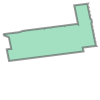

In [83]:
neighborhoods = gpd.read_file('neighborhoods.geojson')


In [89]:
m = folium.Map(location=[37.7749, -122.4194], zoom_start=13, tiles="CartoDB positron")
folium.GeoJson(neighborhoods).add_to(m)
m

In [86]:
m = folium.Map(location=[37.7749, -122.4194], zoom_start=12, tiles="CartoDB positron")
# folium.GeoJson(soft_stories['geometry'].sample(100)).add_to(m)
# folium.GeoJson().add_to(m)
folium.GeoJson(neighborhoods['geometry']).add_to(m)
display(m)
